## Step 1. Import Packages

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pd_web
from datetime import datetime
import yfinance as yf
yf.pdr_override()  # update pandas datareader (yahoo finance api)

import matplotlib.pyplot as plt
import seaborn as sns

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# TS - Statistics
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.stattools import adfuller

# TS - Deep learning
### PYTORCH 관련 모듈 추가<<

# Reg - linear 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Reg - Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Reg - Distance based 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Reg - Ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Reg - Deep Learning
from sklearn.neural_network import MLPRegressor

In [4]:
# Processing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import mean_squared_error

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

## Step 2. Load Datasets

In [5]:
# industry group
tickers_i = ['AAPL','TSLA','MSFT','META','AMZN']

# market
tickers_m = ['SPY','QQQ','DIA','IWM','XLP','GLD','TLT','SHY']

#================================================
## SPY :: S&P500
## QQQ :: NASDAQ
## DIA :: Dow Jones
## IWM :: Russell 2000
## XLP :: Goods(필수소비재)
## GLD :: Gold(달러 대체재)
## TLT :: US Bond - Long(20+ 미 장기채)
## SHY :: US Bond - Short(5- 미 단기채)
#================================================

In [6]:
start_date = datetime(year=2010, month=1, day=2)
end_date = datetime(year=2022, month=12, day=31)

# industry group
df_i = pd_web.DataReader(tickers_i, start=start_date, end=end_date)
# market index
df_m = pd_web.DataReader(tickers_m, start=start_date, end=end_date)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  8 of 8 completed


In [7]:
display(df_i.head(3))
print(f'dates : {df_i.index[0]} ~ {df_i.index[-1]}')
print(f'stocks : {df_i["Adj Close"].columns.tolist()}')

Adj Close                                  Close               \
                AAPL    AMZN META       MSFT TSLA      AAPL    AMZN META   
Date                                                                       
2010-01-04  6.505280  6.6950  NaN  23.623899  NaN  7.643214  6.6950  NaN   
2010-01-05  6.516527  6.7345  NaN  23.631531  NaN  7.656429  6.7345  NaN   
2010-01-06  6.412873  6.6125  NaN  23.486506  NaN  7.534643  6.6125  NaN   

                            ...      Open                               \
                 MSFT TSLA  ...      AAPL    AMZN META       MSFT TSLA   
Date                        ...                                          
2010-01-04  30.950001  NaN  ...  7.622500  6.8125  NaN  30.620001  NaN   
2010-01-05  30.959999  NaN  ...  7.664286  6.6715  NaN  30.850000  NaN   
2010-01-06  30.770000  NaN  ...  7.656429  6.7300  NaN  30.879999  NaN   

               Volume                                 
                 AAPL       AMZN META      MSFT TSLA  
Date                                                  
2010-01-04  493729600  151998000  NaN  38409100  NaN  
2010-01-05  601904800  177038000  NaN  49749600  NaN  
2010-01-06  552160000  143576000  NaN  58182400  NaN  

[3 rows x 30 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['AAPL', 'AMZN', 'META', 'MSFT', 'TSLA']


In [8]:
display(df_m.head(3))
print(f'dates : {df_m.index[0]} ~ {df_m.index[-1]}')
print(f'stocks : {df_m["Adj Close"].columns.tolist()}')

Adj Close                                                          \
                  DIA         GLD        IWM        QQQ        SHY        SPY   
Date                                                                            
2010-01-04  78.578453  109.800003  53.236809  41.005463  73.689140  88.117920   
2010-01-05  78.451965  109.699997  53.053753  41.005463  73.777870  88.351151   
2010-01-06  78.504059  111.510002  53.003815  40.758129  73.786789  88.413376   

                                       Close              ...       Open  \
                  TLT        XLP         DIA         GLD  ...        TLT   
Date                                                      ...              
2010-01-04  63.388359  18.718462  105.660004  109.800003  ...  89.839996   
2010-01-05  63.797718  18.725477  105.489998  109.699997  ...  90.050003   
2010-01-06  62.943703  18.711445  105.559998  111.510002  ...  90.169998   

                        Volume                                         \
                  XLP      DIA       GLD       IWM       QQQ      SHY   
Date                                                                    
2010-01-04  26.450001  8977300  16224100  42863900  62822800  1220600   
2010-01-05  26.690001  6549200  14213100  55523100  62935600   598200   
2010-01-06  26.650000  6797200  24981900  59708600  96033000  1534900   

                                          
                  SPY      TLT       XLP  
Date                                      
2010-01-04  118944600  2829100   8465900  
2010-01-05  111579900  2841600  11805400  
2010-01-06  116074400  4099600   9267000  

[3 rows x 48 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['DIA', 'GLD', 'IWM', 'QQQ', 'SHY', 'SPY', 'TLT', 'XLP']


## Step 3. Drop NA's

In [9]:
df_i['Adj Close']

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2010-01-04,6.505280,6.695000,NaN,23.623899,NaN
2010-01-05,6.516527,6.734500,NaN,23.631531,NaN
2010-01-06,6.412873,6.612500,NaN,23.486506,NaN
2010-01-07,6.401018,6.500000,NaN,23.242254,NaN
2010-01-08,6.443573,6.676000,NaN,23.402542,NaN
...,...,...,...,...,...
2022-12-23,131.658981,85.250000,118.040001,238.133545,123.150002
2022-12-27,129.831772,83.040001,116.879997,236.367981,109.099998
2022-12-28,125.847855,81.820000,115.620003,233.944031,112.709999


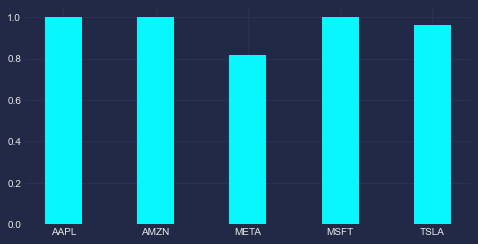

AAPL    1.000000
AMZN    1.000000
META    0.816932
MSFT    1.000000
TSLA    0.962714
dtype: float64


In [10]:
data = df_i['Adj Close'].notna().sum() / df_i['Adj Close'].shape[0]

plt.figure(figsize=(8,4))
plt.bar(x=data.index, height=data.values, width=0.4)
plt.show()

print(data)

In [11]:
# The first day that can tracking META's price
df_i['Adj Close']['META'].dropna().head(1)

Date
2012-05-18    38.23
Name: META, dtype: float64

In [12]:
# let's adjust the start_date to match the first day of the META's
start_date_adj = df_i['Adj Close']['META'].dropna().head(1).index[0]

# And only use "Adj Close" column
df_i_adj = df_i.loc[start_date_adj:, 'Adj Close']
display(df_i_adj)

# Check the NA
print(f'Values(NA) : \n{df_i_adj.isna().sum()}')

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2012-05-18,16.122007,10.692500,38.230000,23.721565,1.837333
2012-05-21,17.061274,10.905500,34.029999,24.110577,1.918000
2012-05-22,16.930264,10.766500,31.000000,24.118683,2.053333
2012-05-23,17.343363,10.864000,32.000000,23.591894,2.068000
2012-05-24,17.184080,10.762000,33.029999,23.559473,2.018667
...,...,...,...,...,...
2022-12-23,131.658981,85.250000,118.040001,238.133545,123.150002
2022-12-27,129.831772,83.040001,116.879997,236.367981,109.099998
2022-12-28,125.847855,81.820000,115.620003,233.944031,112.709999


Values(NA) : 
AAPL    0
AMZN    0
META    0
MSFT    0
TSLA    0
dtype: int64


In [13]:
# apply same metric to df_m 
df_m_adj = df_m.loc[start_date_adj:, 'Adj Close']
display(df_m_adj)

# Check the NA
print(f'Values(NA) : \n{df_m_adj.isna().sum()}')

,DIA,GLD,IWM,QQQ,SHY,SPY,TLT,XLP
Date,,,,,,,,
2012-05-18,97.503418,154.550003,64.020866,54.816559,76.375175,105.475685,95.856735,25.012051
2012-05-21,98.689529,154.649994,65.529442,56.348999,76.384247,107.288612,95.656059,25.109058
2012-05-22,98.705399,152.080002,65.135124,56.285908,76.357056,107.475586,94.590988,25.138903
2012-05-23,98.610458,151.619995,65.555161,56.394077,76.393265,107.532509,95.247009,25.071743
2012-05-24,98.934616,151.410004,65.692299,56.024487,76.366158,107.743835,94.884239,25.310522
...,...,...,...,...,...,...,...,...
2022-12-23,330.227448,167.259995,173.748886,266.946716,80.829056,381.454193,101.390335,74.820312
2022-12-27,330.665161,168.669998,172.583191,263.172577,80.719727,379.949921,99.385551,75.178589
2022-12-28,326.884674,167.910004,169.903076,259.697968,80.719727,375.227936,98.800003,74.243088


Values(NA) : 
DIA    0
GLD    0
IWM    0
QQQ    0
SHY    0
SPY    0
TLT    0
XLP    0
dtype: int64


> '로그'와 '차분'은 모두 예측 안정성을 확보하기 위함

### 3-1. 기본 수익률 분포 (1일 변화량)
- 1일 전 대비 현재 주가(기본 주가)

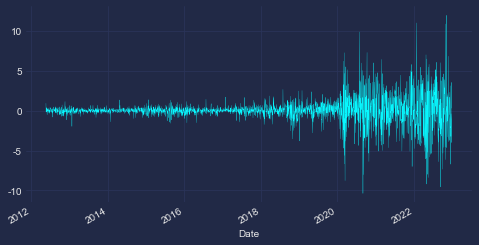

In [14]:
plt.figure(figsize=(8,4))
data = df_i_adj.diff(1)['AAPL']
data.plot(linewidth=0.25)
plt.show()

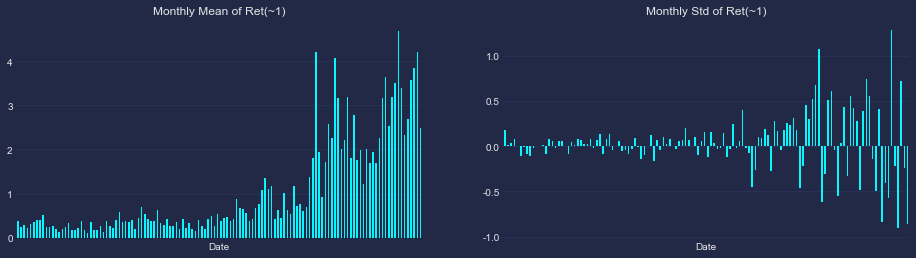

In [15]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Ret(~1)')
axes[1].set_title('Monthly Std of Ret(~1)')
plt.show()

### 3-2. 로그 수익률 1차 차분 분포 (로그 변환 + 1일 변화량)
- 1일 전 대비 현재 주가(로그변환된 주가)

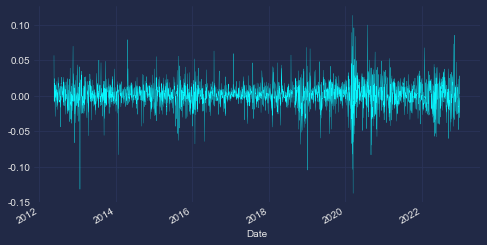

In [16]:
plt.figure(figsize=(8,4))
data = np.log(df_i_adj).diff(1)['AAPL']
data.plot(linewidth=0.25)
plt.show()

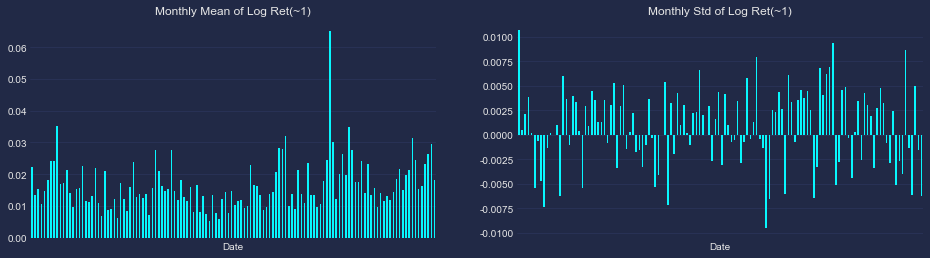

In [17]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Log Ret(~1)')
axes[1].set_title('Monthly Std of Log Ret(~1)')
plt.show()

### 3-3. 로그 수익률 5차 차분 분포 (로그 변환 + 5일 변화량)
- 5일 전 대비 현재 주가(로그변환된 주가)

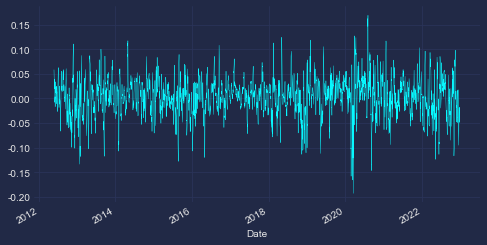

In [18]:
plt.figure(figsize=(8,4))
data = np.log(df_i_adj).diff(5)['AAPL']
data.plot(linewidth=0.4)
plt.show()

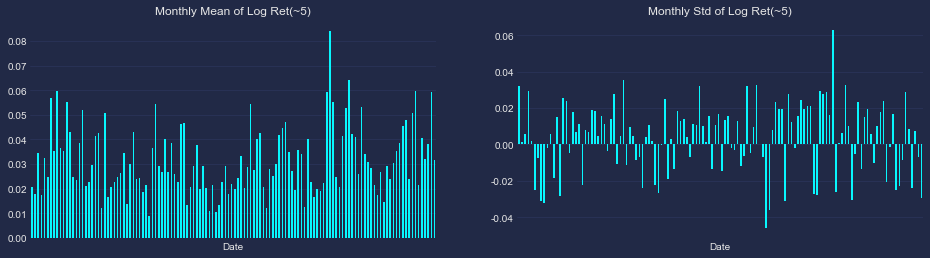

In [19]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Log Ret(~5)')
axes[1].set_title('Monthly Std of Log Ret(~5)')
plt.show()